In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk    

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = "https://drive.google.com/file/d/1IoSOhGr9JdotSEs1PTcJvvyBlbpg8ghf/view?usp=sharing"

In [4]:
id = '1IoSOhGr9JdotSEs1PTcJvvyBlbpg8ghf'

In [5]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Reviews.csv')  
df = pd.read_csv('Reviews.csv')

In [6]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
### add some columns for upvote metrics
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [9]:
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [10]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [11]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [13]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

In [14]:
df.groupby(['Score', '%upvote']).nunique()

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       5452    5293         5091                     1   
      0-20%      2338       1909    1555         1543                    14   
      20-40%     4649       3165    2937         2882                    24   
      40-60%     6586       4001    4136         4022                    30   
      60-80%     5838       3302    3637         3563                    55   
      80-100%   12531       6580    8912         8491                   117   
2     Empty      4234       2900    2697         2661                     1   
      0-20%       762        649     419          419                     8   
      20-40%     1618       1420    1105         1102                    15   
      40-60%     3051       2244    1955         1942                    17   
      60-80%     2486       1888    1733         1712                    45   
      80-100%    7014       4756    4920         4790                    86   
3     Empty      5062       3216    3147         3096                     1   
      0-20%       474        444     315          315                     7   
      20-40%     1506       1254     941          935                    14   
      40-60%     3384       2313    2188         2167                    19   
      60-80%     2754       2159    1841         1828                    36   
      80-100%   11037       6673    7196         6995                    94   
4     Empty      4780       2614    2918         2886                     1   
      0-20%       116        113      95           95                     5   
      20-40%      909        679     603          603                    10   
      40-60%     3185       2192    2097         2076                    16   
      60-80%     2941       2333    2000         1970                    27   
      80-100%   26707      12983   16321        15659                    99   
5     Empty     11638       5439    7465         7284                     1   
      0-20%       432        373     272          272                     9   
      20-40%     2275       1503    1468         1455                    16   
      40-60%    10312       5504    6761         6625                    23   
      60-80%    11060       6352    7449         7303                    58   
      80-100%  140661      35035   79435        72288                   183   

               HelpfulnessDenominator  Time  Summary    Text  Helpful %  
Score %upvote                                                            
1     Empty                        37  1486     4990    5517          1  
      0-20%                        71  1033     1519    1587        109  
      20-40%                       59  1405     2850    3014         93  
      40-60%                       48  1563     3921    4268         72  
      60-80%                       71  1525     3478    3739        106  
      80-100%                     122  1833     8237    9248        178  
2     Empty                        31  1183     2609    2802          1  
      0-20%                        45   381      414     421         55  
      20-40%                       37   822     1080    1126         40  
      40-60%                       28  1159     1920    2009         32  
      60-80%                       49  1112     1700    1784         60  
      80-100%                      93  1621     4759    5137        121  
3     Empty                        22  1315     3186    3363          1  
      0-20%                        30   297      322     324         37  
      20-40%                       32   739      943     967         40  
      40-60%                       29  1254     2224    2284         31  
      60-80%                       46  1170     1873    1918         55  
      80-100%                     103  1927     7371    7843        140  
4     Empt

In [15]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [16]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [17]:
df_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

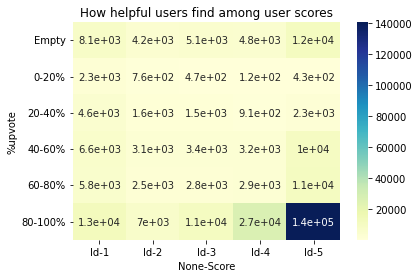

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

plt.rcParams["figure.figsize"]=30,10
plt.show()

Note from the above heatmap: 

1.   Reviews are skewed towards positive reviews and more than half of the reviews are helpful in nature
2.   People mostly agree with helpful reviews

In [19]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

*   Removing all neutral scores as they won't help to identify the sentiment
*   Classifying scores below 3 as 0 and higher than 3 as 1



In [20]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

###Applying bag of words technique and Logistic regression


*   Calling stop words for vectorisation
*   Using logistic regression for prediction based on the vectorised matrix



In [21]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [22]:
X_c = c.fit_transform(X)

The number of features rose from just 60+ columns to more than 1 million

In [23]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


In [24]:
from sklearn.model_selection import train_test_split
# default train size of 75%
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


Implementing logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [26]:
ml = log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9358102454090405


#### fetch Top 20 Positive & Top 20 negative words

In [27]:
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [28]:
coef = ml.coef_.tolist()[0]
coef

[-0.4343157990364796,
 0.5338448927166674,
 0.347590380585459,
 -0.011387774532267985,
 -0.008946313342425245,
 -0.00952466766305016,
 0.0002894591226234814,
 0.0003697038759984691,
 0.0003697038759984691,
 0.0,
 0.0013957350939408236,
 -0.012474432329158429,
 0.0011122831541119866,
 0.01194293296148718,
 -0.11941066184365835,
 0.0008978486294760066,
 0.002067313189167081,
 0.0027226603005946802,
 0.0005587242038121011,
 4.9171986508372564e-05,
 -0.004869344748279178,
 0.014641231252344624,
 0.030949536694767583,
 0.030949536694767583,
 0.030949536694767583,
 0.030949536694767583,
 0.030949536694767583,
 0.030949536694767583,
 0.030949536694767583,
 0.030949536694767583,
 0.030949536694767583,
 -0.0003332387504242512,
 0.049368364312380834,
 0.0,
 0.0,
 -0.00046523600816759844,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001005309925723422,
 0.003932598116160035,
 -0.0505669127548329,
 0.00010040428024917435,
 0.00642198792652373,
 0.0,
 0.0,
 -0.00253544526378935,
 0.016347821223165672,
 

In [29]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.434316
1,000,0.533845
2,0000,0.347590
3,000001,-0.011388
4,00001,-0.008946
...,...,...
114964,çaykur,0.000000
114965,çelem,-0.098490
114966,être,0.000000
114967,île,0.000000


In [30]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,3.657957
55029,hooked,2.641754
39072,downside,2.622017
5865,addicting,2.547859
94667,skeptical,2.280782
...,...,...
24949,cancelled,-2.685975
106852,unacceptable,-2.700104
113164,worst,-2.850447
34989,deceptive,-2.993047


In [31]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
      Word  Coefficient
pleasantly     3.657957
    hooked     2.641754
  downside     2.622017
 addicting     2.547859
 skeptical     2.280782
  drawback     2.100559
    delish     2.024504
  hesitant     1.995840
    resist     1.938817
  soothing     1.908537
  terrific     1.863511
   welcome     1.838650
   perfect     1.829694
   awesome     1.822379
      whim     1.816522
    intend     1.774623
 delicious     1.760398
 excellent     1.757372
  relaxing     1.746657
       met     1.732583


-Top 20 negative-
         Word  Coefficient
      sounded    -1.957729
         lame    -1.984070
       ruined    -2.021861
        lousy    -2.061612
        blech    -2.081284
  embarrassed    -2.094680
       bummer    -2.113382
   flavorless    -2.147814
     terrible    -2.163110
  unappealing    -2.168039
   overpowers    -2.209310
       ripoff    -2.325893
  disapointed    -2.378742
     mediocre    -2.462150
disappointing    -2.593026
    cancelled    -2.685975